In [8]:
# Numerical Analysis
# The relationship between β∗ and a, c_b, λ (fixing µ = 1, n = 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
lam = 0.4 #lambda
mu = 0.25 #mu
rho = 0.1 #discount factor lam+2*mu+rho=1
cost = 0.5 #technological cost
a = 0.6 #fault probability
p1 = 0.1
p2 = 0.9
theta = 0.001 #converge threshold
maxLength = 32

In [10]:
value = np.zeros([maxLength+1, maxLength+1])
policy = np.zeros([maxLength+1, maxLength+1])
while True:
    while True:
        delta = 0
        val = value.copy()
        for x in range(maxLength+1):
            for y in range(maxLength+1):
                v = value[x][y]
                b = policy[x][y]
                xx = min(x+1,maxLength)
                yy = min(y+1,maxLength)
                if xx == x or yy == y:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*max(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
                else:
                    value[x][y] = x+y+cost*b+mu*(val[max(x-1,0)][y]+val[x][max(y-1,0)])+(1-(1-b)*a)*lam*min(val[xx][y],val[x][yy])+p1*(1-b)*a*lam*val[xx][y]+p2*(1-b)*a*lam*val[x][yy]
                delta = max(delta, abs(v-value[x][y]))
        if delta<theta:
            break
    stable = True
    for x in range(maxLength+1):
        for y in range(maxLength+1):
            old = policy[x][y]
            xx = min(x+1,maxLength)
            yy = min(y+1,maxLength)
            diff = a*lam*(p1*value[xx][y]+p2*value[x][yy]-min(value[xx][y],value[x][yy]))
            if diff <= cost:
                policy[x][y] = 0
            else:
                policy[x][y] = 1
            if old != policy[x][y]:
                stable = False
    if stable:
        break

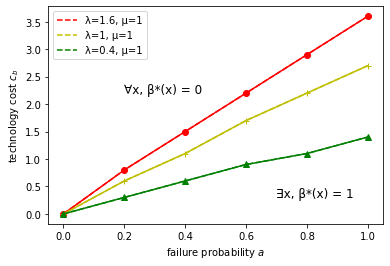

In [11]:
# By changing different parameters, we get the tipping points
r = [0,0.2,0.4,0.6,0.8,1]
c1 = [0,0.8,1.5,2.2,2.9,3.6]
c2 = [0,0.6,1.1,1.7,2.2,2.7]
c3 = [0,0.3,0.6,0.9,1.1,1.4]
l1=plt.plot(r,c1,'r--',label='λ=1.6, μ=1')
l2=plt.plot(r,c2,'y--',label='λ=1, μ=1')
l3=plt.plot(r,c3,'g--',label='λ=0.4, μ=1')
plt.plot(r,c1,'ro-',r,c2,'y+-',r,c3,'g^-')
plt.xlabel('failure probability $a$')
plt.ylabel('technology cost $c_b$')
plt.text(0.2, 2.2, "∀x, β*(x) = 0", size=12)
plt.text(0.7, 0.3, "∃x, β*(x) = 1", size=12)
plt.legend()